# Process Dataset 1 and DataSet 2 individualy and merge it and create new Dataset 

In [34]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Load DataSet 1

In [35]:
file_path = "dataset_1.csv"
df1 = pd.read_csv(file_path)
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


## 2.Data Preprocessing

In [36]:
#list of columns names for df
print(df1.columns.tolist())

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp']


In [37]:
#Find Missing values
print("Missing Values:\n", df1.isnull().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64


No missing values present in dataset

In [38]:
### Check Duplicate Values
print("\nDuplicate Rows:", df1.duplicated().sum())


Duplicate Rows: 0


no dulicate values present in dataset

In [39]:
# Remove unnecessary columnsc(yr and month ,because already there in date)
df1.drop(columns=['mnth', 'yr'], inplace=True , errors='ignore')
df1.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,False,6,1,0.24
1,2,01-01-2011,1,1,False,6,1,0.22
2,3,01-01-2011,1,2,False,6,1,0.22
3,4,01-01-2011,1,3,False,6,1,0.24
4,5,01-01-2011,1,4,False,6,1,0.24


In [7]:
# Check Data Types
print(df1.dtypes)

instant         int64
dteday         object
season          int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
dtype: object


 dteday is object datatype , convert it into datetime Datatype

In [8]:
# convert other datatype in numeric (dttype and holiday)

In [40]:
#conver holiday in 0 nad 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1["holiday"]= label_encoder.fit_transform(df1["holiday"])
# Convert dteday
df1['dteday'] = pd.to_datetime(df1['dteday'], format='%d-%m-%Y')
df1.head()


,instant,dteday,season,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,0,6,1,0.24
1,2,2011-01-01,1,1,0,6,1,0.22
2,3,2011-01-01,1,2,0,6,1,0.22
3,4,2011-01-01,1,3,0,6,1,0.24
4,5,2011-01-01,1,4,0,6,1,0.24


In [41]:
# Check Data Types
print(df1.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
hr                     int64
holiday                int64
weekday                int64
weathersit             int64
temp                 float64
dtype: object


## 3. Visualisations


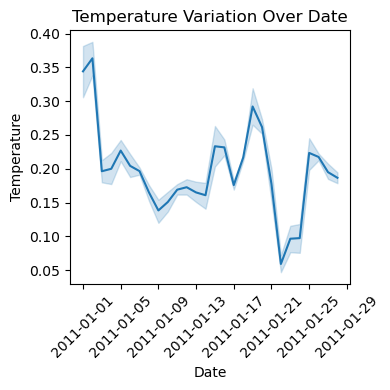

In [42]:
# Temperature Over Date

plt.figure(figsize=(4, 4))
sns.lineplot(data=df1, x='dteday', y='temp')
plt.title('Temperature Variation Over Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

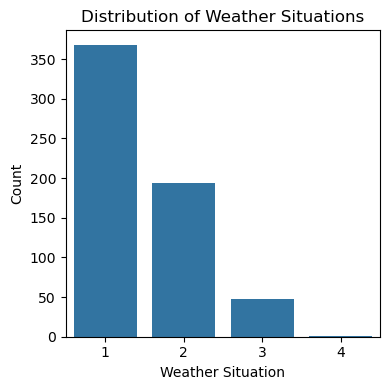

In [43]:
# Weather Situation Count
plt.figure(figsize=(4, 4))
sns.countplot(data=df1, x='weathersit')
plt.title('Distribution of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [46]:
# Pie Chart of Weather Situations
weather_counts = df1['weathersit'].value_counts().sort_index()
print(weather_counts)
labels = ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain']


weathersit
1    368
2    194
3     47
4      1
Name: count, dtype: int64


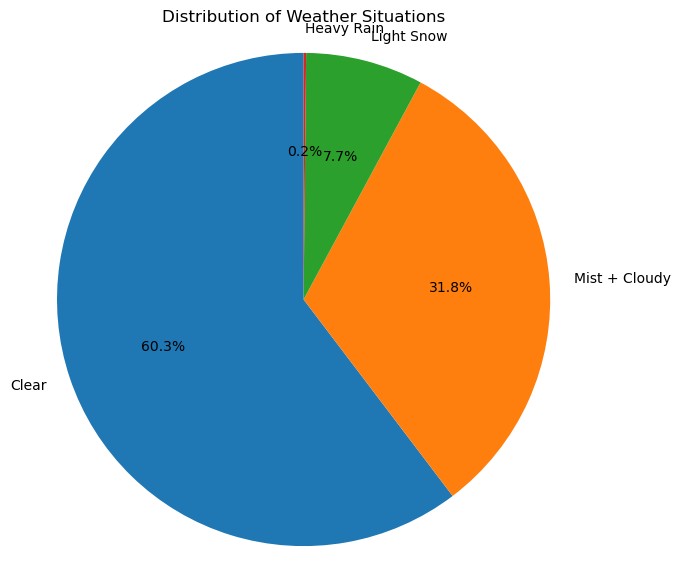

In [55]:
plt.figure(figsize=(7, 7))
plt.pie(weather_counts, labels=labels[:len(weather_counts)], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Situations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 1. Load Dataset 2


In [15]:
# Load Dataset2
file_path = "dataset_2.csv"
df2 = pd.read_csv(file_path)
df2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


## 2.Data Preprocessing

In [16]:
# Check for Missing 
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Unnamed: 0     0
instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


we found one column(atemp) with null values  atemp , so fill it with mean()

In [17]:
# handle for Missing  for atemp 

In [18]:
# calculate mean value
atemp_mean=df2['atemp'].mean()
atemp_mean

0.19993489148580967

In [19]:
#handel the null value for atemp
df2.fillna({'atemp': atemp_mean}, inplace=True)
df2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [20]:
# cross check mising values

In [21]:
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Unnamed: 0    0
instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [22]:
### Check Duplicate Values
print("\nDuplicate Rows:", df2.duplicated().sum())


Duplicate Rows: 0


No duplicate values presnt in dataset

In [23]:
# Check Data Types
print(df2.dtypes)

Unnamed: 0      int64
instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


All are numeric data types so no need data type conversion

In [24]:
# Remove unnecessary columnsc(Unnamed)
df2.drop(columns=['Unnamed: 0'], inplace=True , errors='ignore')

In [25]:
df2.columns.tolist()

['instant', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [26]:
df2.head()

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0,3,13,16
1,2,0.2727,0.80,0.0,8,32,40
2,3,0.2727,0.80,0.0,5,27,32
3,4,0.2879,0.75,0.0,3,10,13
4,5,0.2879,0.75,0.0,0,1,1


## 3. Visualisation


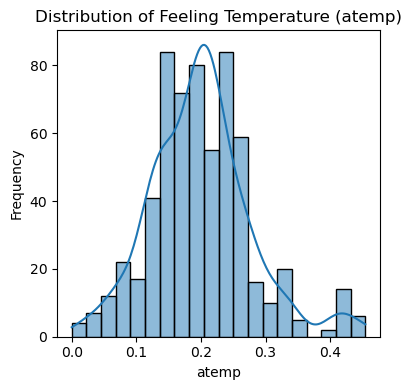

In [56]:
# 1. histplot:Distribution of atemp
plt.figure(figsize=(4, 4))
sns.histplot(df2['atemp'], kde=True,bins=20)
plt.title('Distribution of Feeling Temperature (atemp)')
plt.xlabel('atemp')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

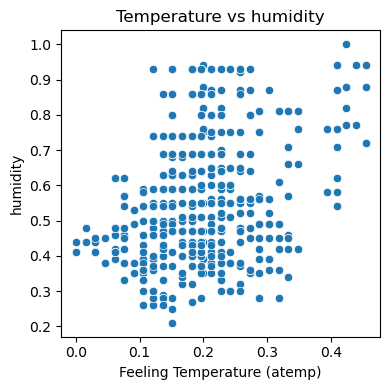

In [57]:
# 2. Scatter plot: Feeling Temperature vs humidity
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df2, x='atemp', y='hum')
plt.title('Temperature vs humidity')
plt.xlabel('Feeling Temperature (atemp)')
plt.ylabel('humidity')
plt.tight_layout()
plt.show()

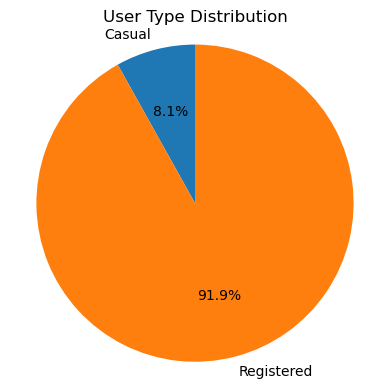

In [29]:
# Pie chart of casual vs registered users
user_totals = [df2['casual'].sum(), df2['registered'].sum()]
labels = ['Casual', 'Registered']
plt.figure(figsize=(4, 4))
plt.pie(user_totals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('User Type Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Merge datasets

In [30]:
# Inner Join – all rows from both, fill missing with NaN
dataset_A = pd.merge(df1, df2, on='instant', how='inner')
dataset_A.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


# Save to CSV file

In [31]:

dataset_A.to_csv('dataset_A.csv', index=False)

# Read CSV File And Check Dataset

In [32]:
file_path1 = "dataset_A.csv"
df3 = pd.read_csv(file_path1)
df3.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1
